# 10. 다양체 학습(Manifold Learning)
- 높은 차원의 데이터를 저차원으로 축소하는 방법
    - ![](images/2023-05-01-11-18-46.png)
- 정보의 손실을 최소한으로 하면서 차원 축소를 해야 함
- 고차원 데이터를 2차원 또는 3차원으로 축소해서 시각화에 활용할 수 있음
- 차원 축소 과정에서 중요하지 않은 정보는 버려지고 중요한 정보만 남기 때문에 데이터 정제에 활용 가능

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(["seaborn-whitegrid"])

from sklearn.random_projection import SparseRandomProjection
from sklearn.manifold import LocallyLinearEmbedding, Isomap, SpectralEmbedding, TSNE, MDS
from sklearn.datasets import load_digits, make_s_curve
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_1932/4034761648.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-whitegrid"])


## 데이터 생성 및 시각화

In [55]:
# s_curve 시각화 함수
def plot_s_curve(data, colors, position, projection):
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    if projection == "3d":
        ax = plt.subplot(position, projection=projection)
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, cmap=plt.cm.Spectral)
        ax.view_init(4, -72)
    elif projection == "2d":
        ax = plt.subplot(position)
        ax.scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral)

# 손글씨 시각화 함수
def plot_digits(data, labels, position, projection):
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    if projection == "3d":
        ax = plt.subplot(position, projection=projection)
        for i in range(len(data)):
            ax.text(data[i, 0], data[i, 1], data[i, 2], s=labels[i], color=plt.cm.Set1(labels[i] / 10), fontdict={"weight": "bold", "size": 9})
        ax.view_init(4, -72)
    elif projection == "2d":
        ax = plt.subplot(position)
        for i in range(len(data)):
            ax.text(data[i, 0], data[i, 1], s=labels[i], color=plt.cm.Set1(labels[i] / 10), fontdict={"weight": "bold", "size": 9})

In [65]:
# s_curve 데이터
s_curve, colors = make_s_curve(n_samples=1000, random_state=0)

# 손글씨 데이터
digits, labels = load_digits(return_X_y=True)

# random projection
random_proj = SparseRandomProjection(n_components=3, random_state=0)
digits_random = random_proj.fit_transform(digits)

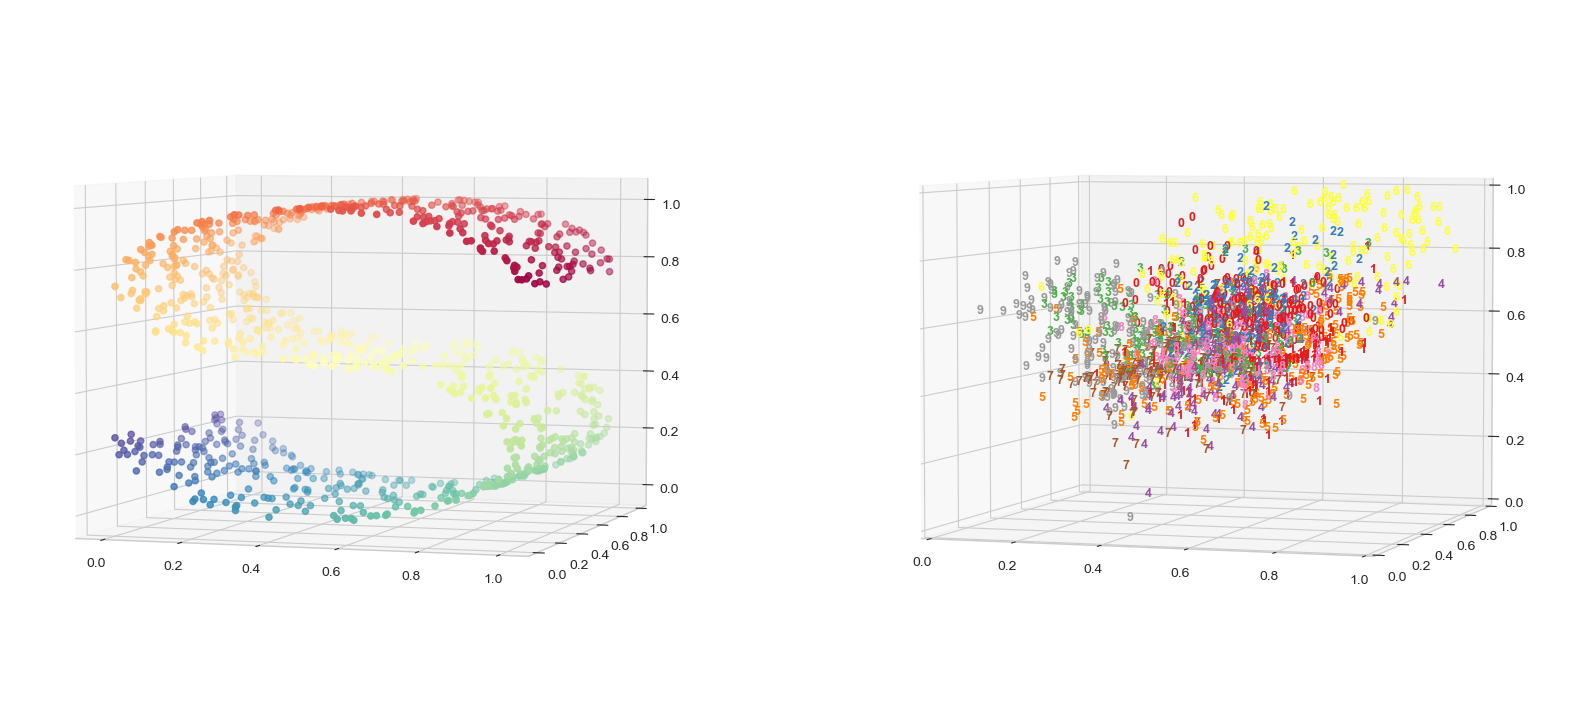

In [67]:
# 시각화
plt.figure(figsize=(20, 10))
plot_s_curve(s_curve, colors, 121, "3d")
plot_digits(digits_random, labels, 122, "3d")

## Locally Linear Embedding(LLE)
- 국소 이웃 거리를 보존하는 저차원 임베딩을 찾음
- 가까운 포인트들끼리 모여있음
- 이웃간의 거리를 기반으로 유지

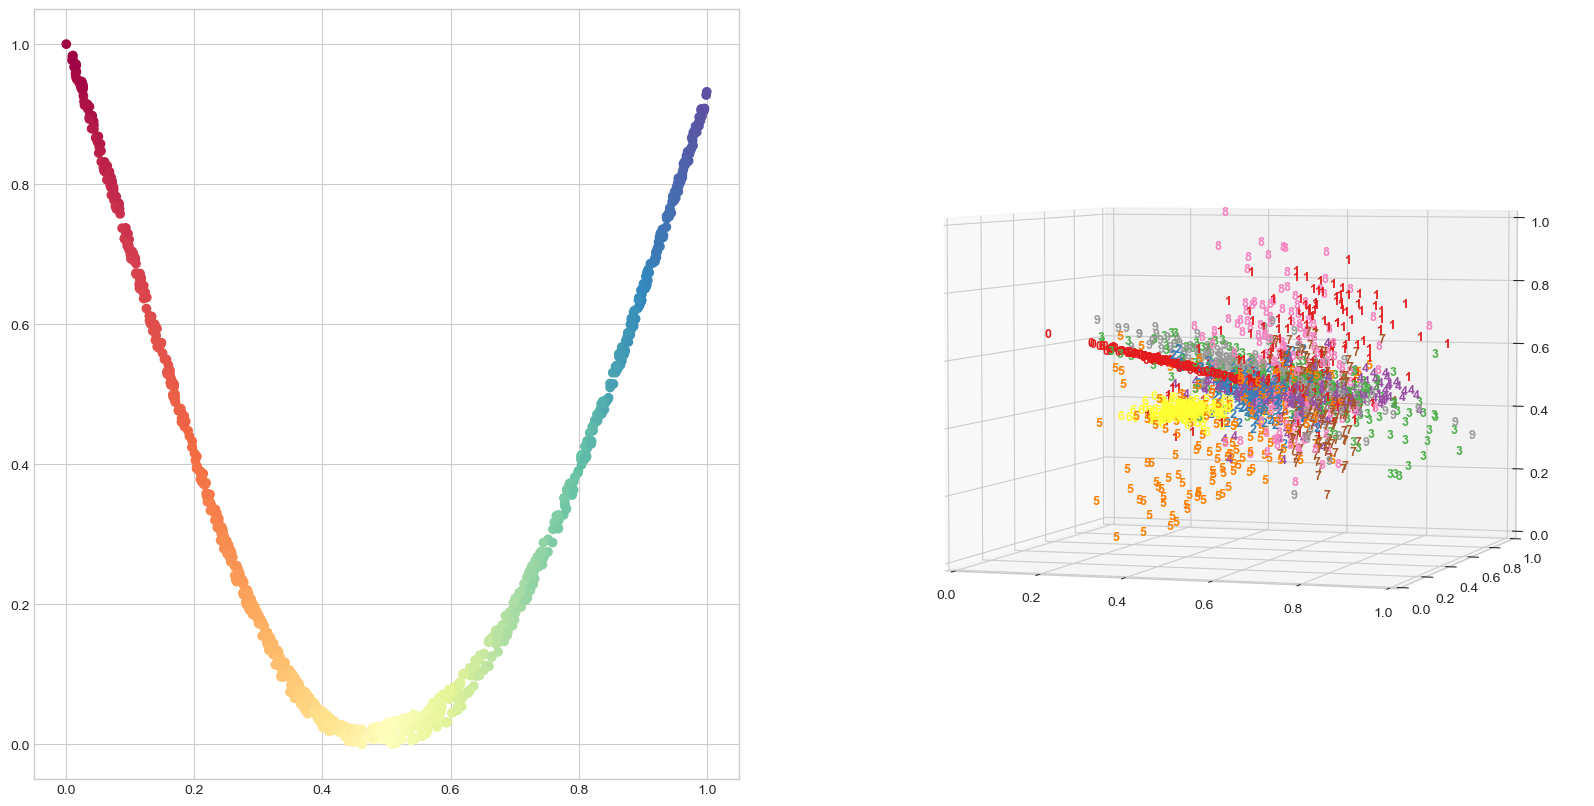

In [71]:
# 데이터
s_curve_lle = LocallyLinearEmbedding(n_neighbors=30, n_components=2, method="standard", random_state=0).fit_transform(s_curve)
digits_lle = LocallyLinearEmbedding(n_neighbors=30, n_components=3, method="standard", random_state=0).fit_transform(digits)

# 시각화
plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_lle, colors, 121, "2d")
plot_digits(digits_lle, labels, 122, "3d")

## Local Tangent Space Alignment(LTSA)
- 탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화
- 국소 탄젠트 공간을 정렬

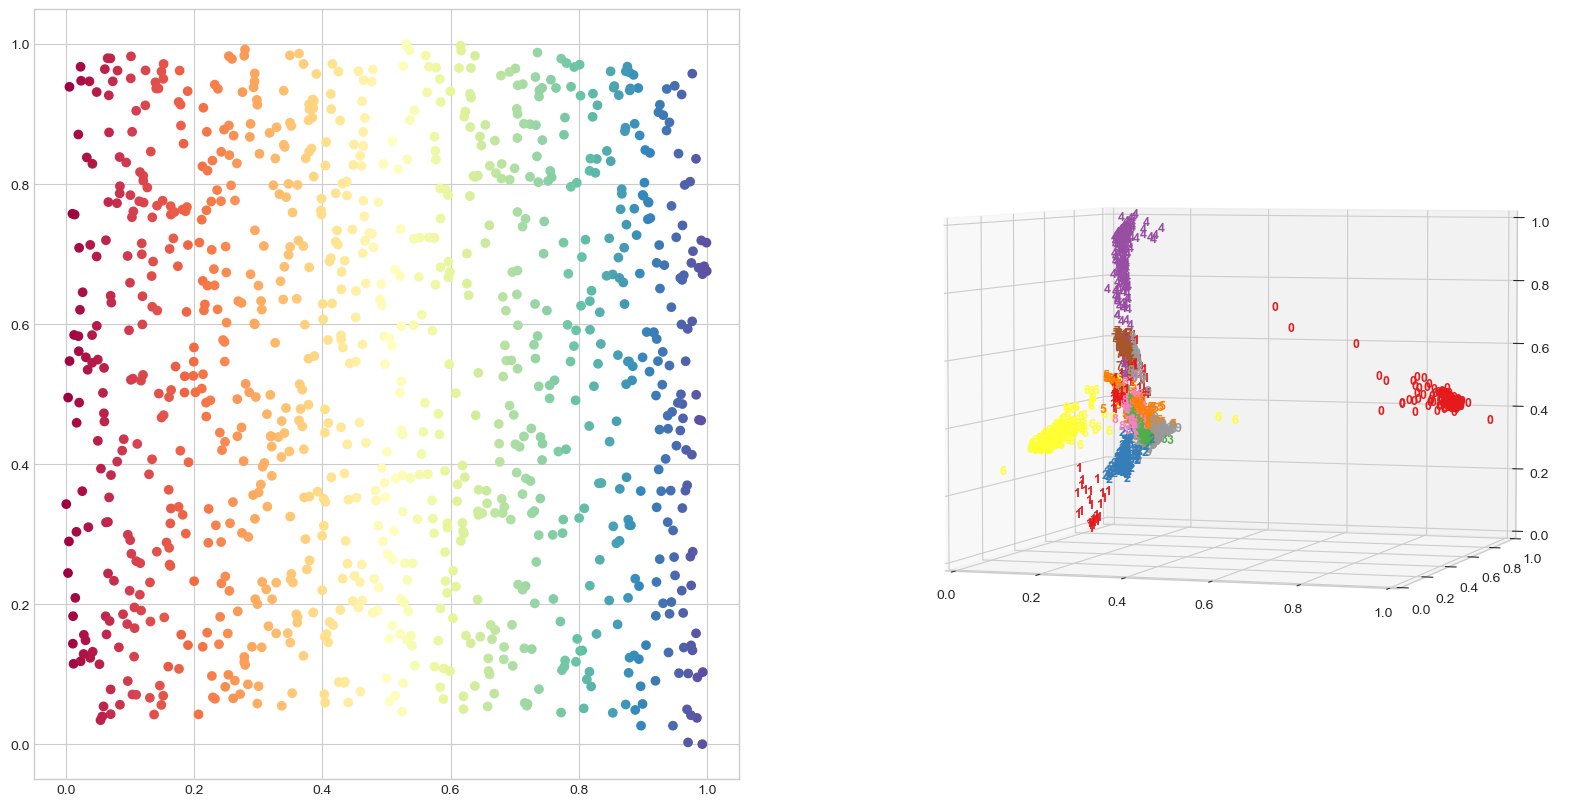

In [74]:
# 데이터
s_curve_ltsa = LocallyLinearEmbedding(n_neighbors=30, n_components=2, method="ltsa", random_state=0).fit_transform(s_curve)
digits_ltsa = LocallyLinearEmbedding(n_neighbors=30, n_components=3, method="ltsa", random_state=0).fit_transform(digits)

# 시각화
plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_ltsa, colors, 121, "2d")
plot_digits(digits_ltsa, labels, 122, "3d")

## Modified Locally Linear Embedding
- 각 이웃에 여러 가중치 벡터를 사용
- n_neighbors > n_components를 만족해야 함

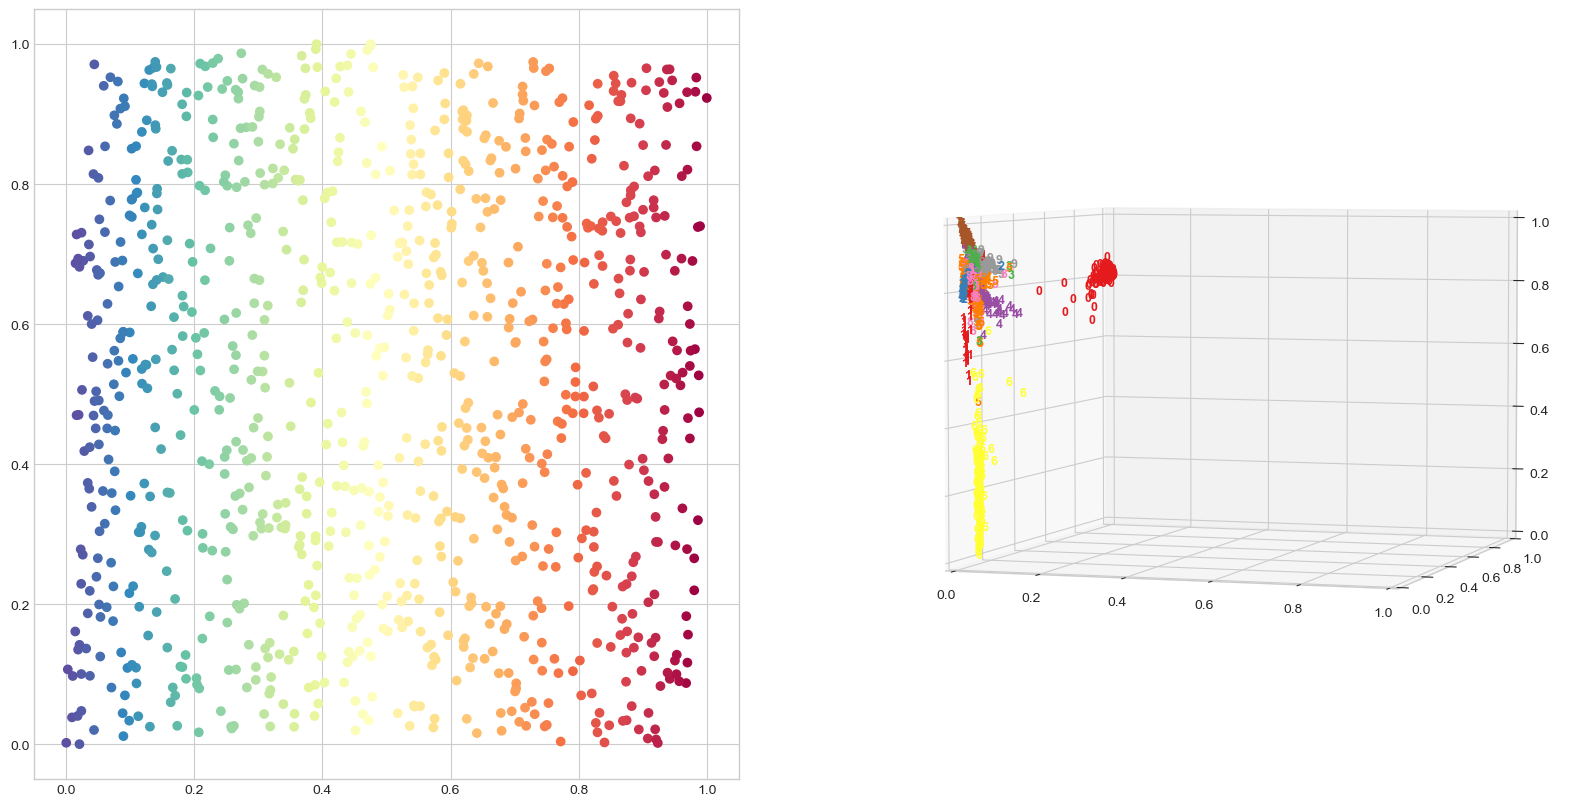

In [78]:
# 데이터
s_curve_mlle = LocallyLinearEmbedding(n_neighbors=30, n_components=2, method="modified", random_state=0).fit_transform(s_curve)
digits_mlle = LocallyLinearEmbedding(n_neighbors=30, n_components=3, method="modified", random_state=0).fit_transform(digits)

# 시각화
plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_mlle, colors, 121, "2d")
plot_digits(digits_mlle, labels, 122, "3d")

## ISOMAP
- 초기의 다양체 학습 알고리즘
- MDS와 커널 PCA의 확장으로 볼 수 있음
- 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음
    - 고차원에서 저차원으로 바꿀 때 어떤 특성을 유지할지에 대한 기준으로 사용

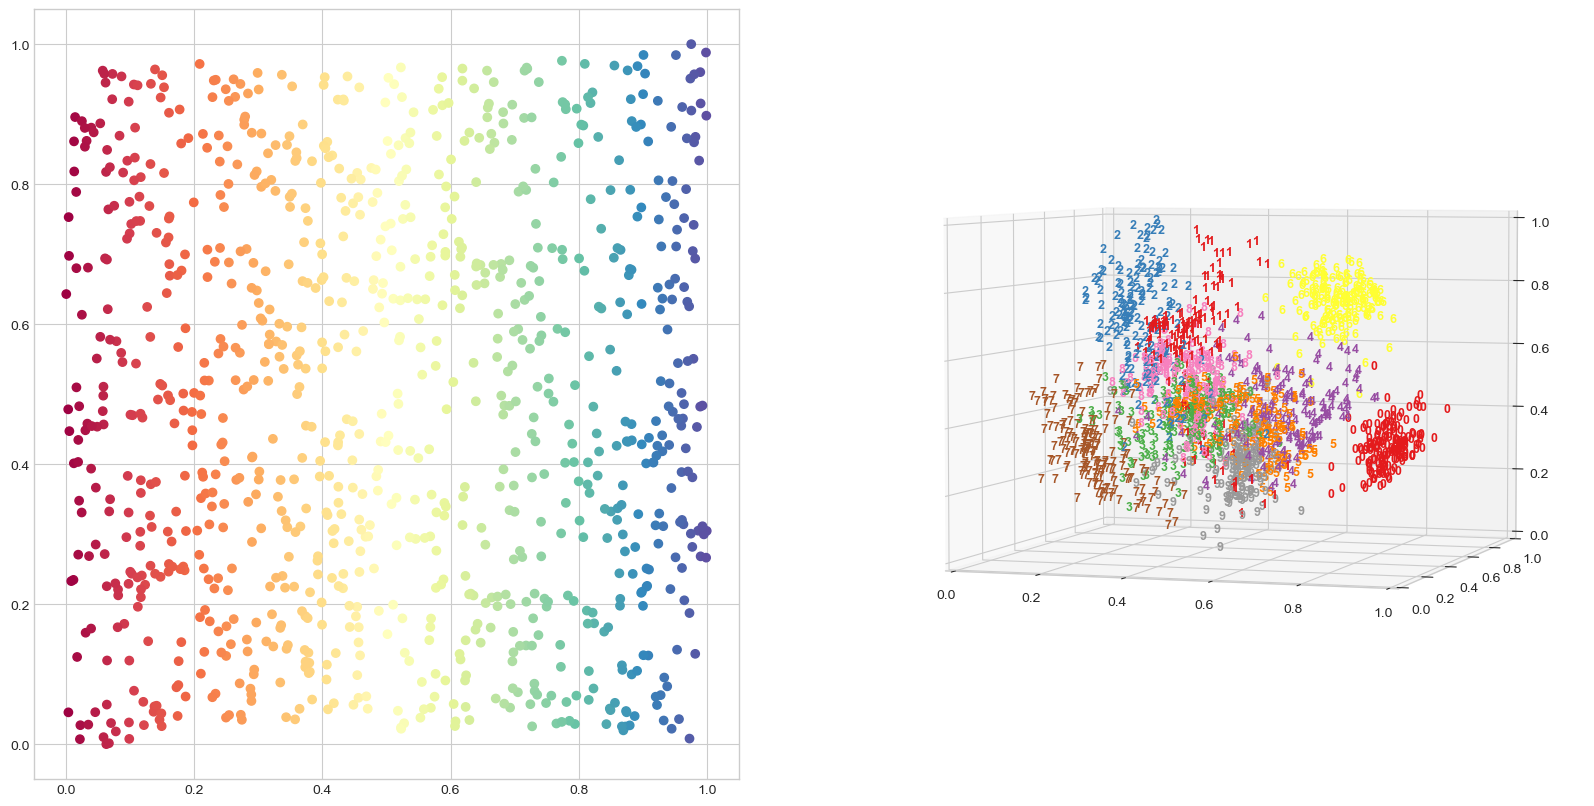

In [77]:
# 데이터
s_curve_isomap = Isomap(n_neighbors=30, n_components=2).fit_transform(s_curve)
digits_isomap = Isomap(n_neighbors=30, n_components=3).fit_transform(digits)

# 시각화
plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_isomap, colors, 121, "2d")
plot_digits(digits_isomap, labels, 122, "3d")

## Multi-Dimensional Scaling(MDS)
- 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾음

/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


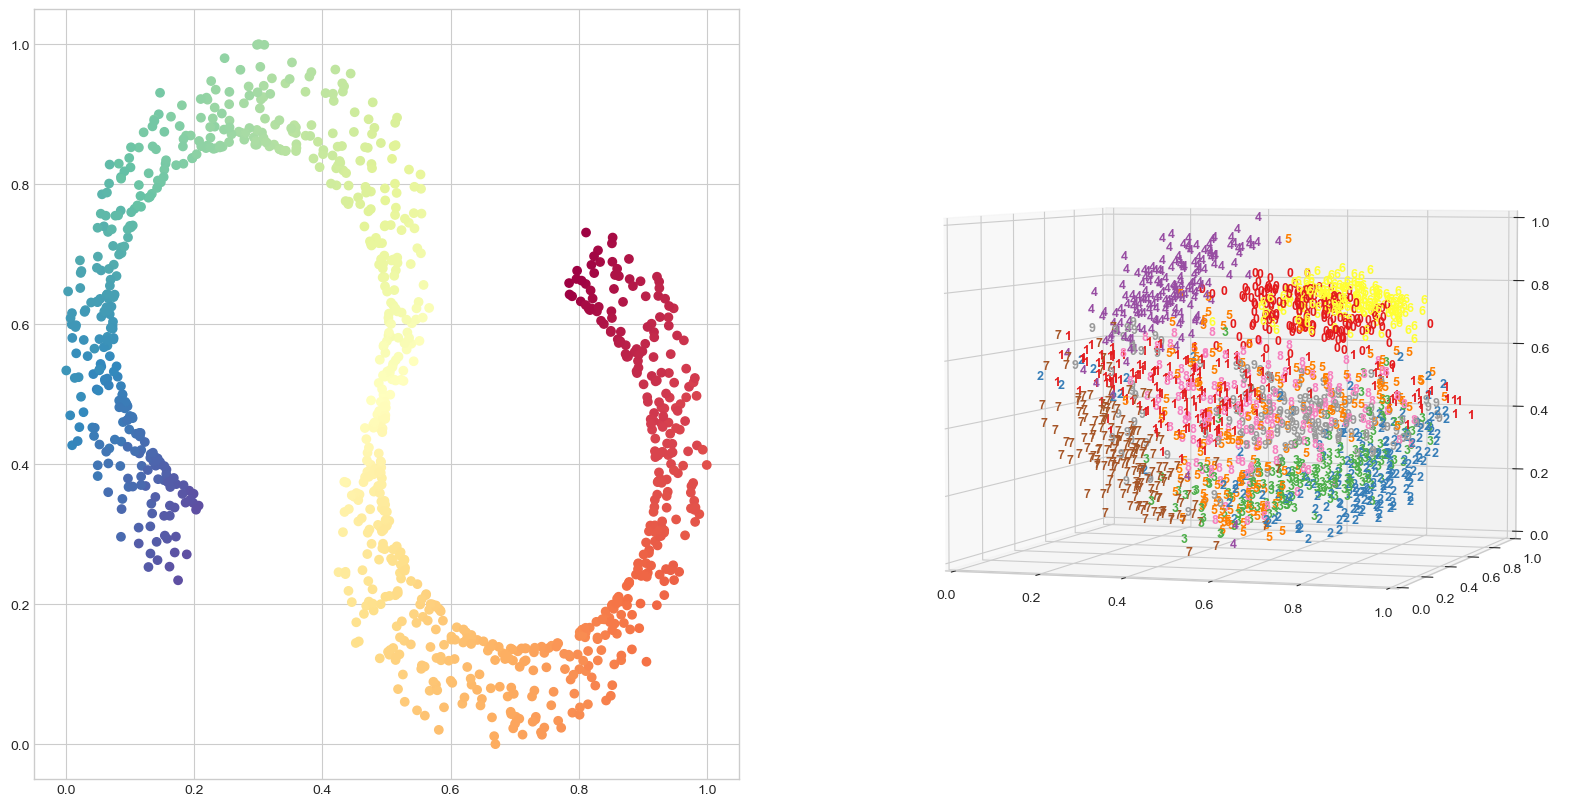

In [81]:
# 데이터
s_curve_mds = MDS(n_components=2, random_state=0).fit_transform(s_curve)
digits_mds = MDS(n_components=3, random_state=0).fit_transform(digits)

# 시각화
plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_mds, colors, 121, "2d")
plot_digits(digits_mds, labels, 122, "3d")

## Spectral Embedding
- 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음
- 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

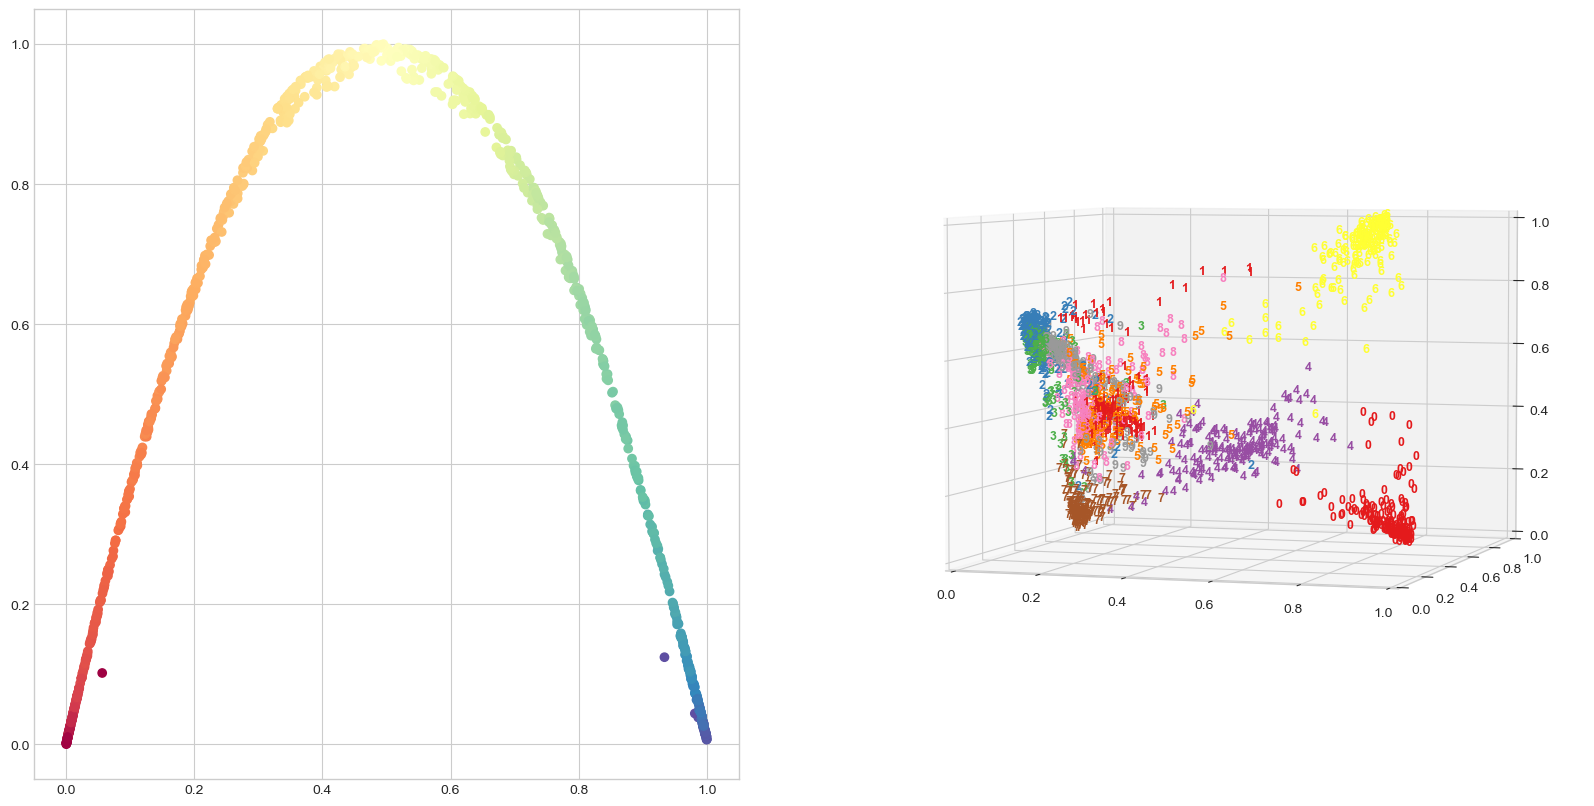

In [87]:
# 데이터
s_curve_se = SpectralEmbedding(n_components=2, random_state=0).fit_transform(s_curve)
digits_se = SpectralEmbedding(n_components=3, random_state=0).fit_transform(digits)

# 시각화
plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_se, colors, 121, "2d")
plot_digits(digits_se, labels, 122, "3d")

## t-distributed Stochastic Neighbor Embedding(t-SNE)
- 데이터 포인트의 유사성을 확률로 변환
- 국소 구조에 민감
- 국소 구조를 기반으로 샘플 그룹을 추출하는 데 강함
- 항상 KL발산의 국소 최소값에서 끝남
- 계산 비용이 많이 듬
- 전역 구조를 보존하지 않음

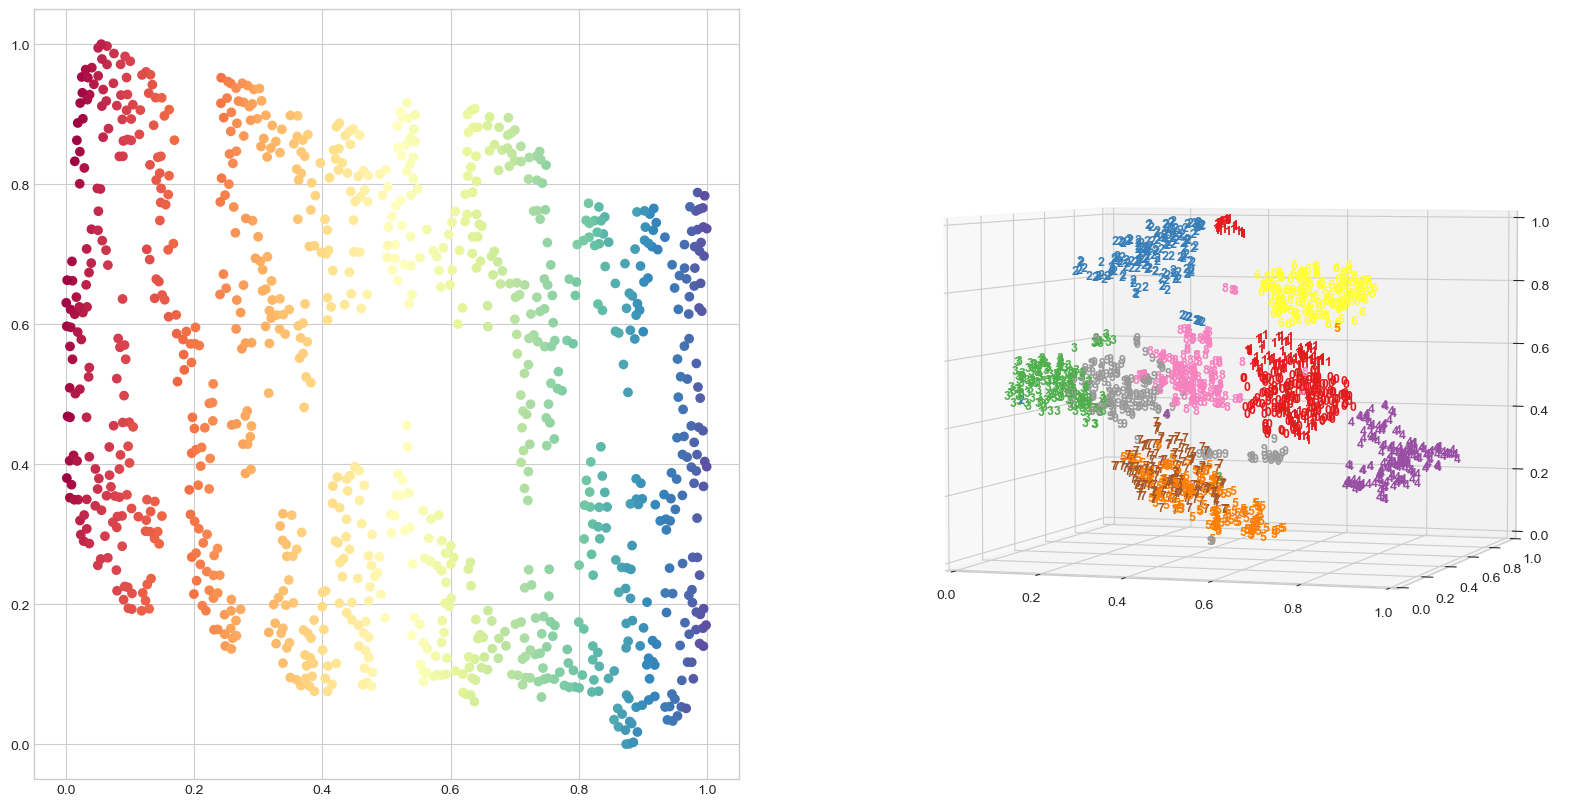

In [88]:
# 데이터
s_curve_tsne = TSNE(n_components=2, random_state=0).fit_transform(s_curve)
digits_tsne = TSNE(n_components=3, random_state=0).fit_transform(digits)

# 시각화
plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_tsne, colors, 121, "2d")
plot_digits(digits_tsne, labels, 122, "3d")

## 정제된 표현을 이용한 학습
- 다양체 학습의 결과를 정제된 데이터로 생각할 수 있음
- 정제된 표현이기 때문에 분석에 비교적 용이함
    - 손실을 감안하고 분석에 필요한 중요한 정보들을 선택해서 저차원으로 변화했기 때문
- 기계학습 모델의 입력으로 사용했을 때 성능 향상을 기대할 수 있음

In [89]:
# 손글씨 데이터
raw_digits, target = load_digits(return_X_y=True)

# 모델들
knn = KNeighborsClassifier()
svc = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

### 원본 데이터를 사용할 때

#### KNN

In [90]:
# 교차검증 수행
score = cross_validate(estimator=knn,
                       X=raw_digits, y=target,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.9627282575054161 (+/- 0.011168537355954218)


#### SVM

In [91]:
# 교차검증 수행
score = cross_validate(estimator=svc,
                       X=raw_digits, y=target,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.9632838130609718 (+/- 0.02008605863225686)


#### Decision Tree

In [92]:
# 교차검증 수행
score = cross_validate(estimator=decision_tree,
                       X=raw_digits, y=target,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.7830114515629837 (+/- 0.042399088130001525)


#### Random Forest

In [93]:
# 교차검증 수행
score = cross_validate(estimator=random_forest,
                       X=raw_digits, y=target,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.9393670690188796 (+/- 0.018983029240548382)


### 정제된 데이터를 사용할 때

In [94]:
# 손글씨 데이터
raw_digits, target = load_digits(return_X_y=True)

# 손글씨 데이터 정제
digits_tsne = TSNE(n_components=2, random_state=0).fit_transform(raw_digits)

#### KNN

In [95]:
# 교차검증 수행
score = cross_validate(estimator=knn,
                       X=digits_tsne, y=target,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.9760817084493965 (+/- 0.010625052345240266)


#### SVM

In [96]:
# 교차검증 수행
score = cross_validate(estimator=svc,
                       X=digits_tsne, y=target,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.9716326214794181 (+/- 0.015457639810894036)


#### Decision Tree

In [97]:
# 교차검증 수행
score = cross_validate(estimator=decision_tree,
                       X=digits_tsne, y=target,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.9605106778087279 (+/- 0.03448591541428244)


#### Random Forest

In [98]:
# 교차검증 수행
score = cross_validate(estimator=random_forest,
                       X=digits_tsne, y=target,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.9660770659238626 (+/- 0.022304924908215923)


In [100]:
digits[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])